In [87]:
import pandas as pd
from pyzotero import zotero
from habanero import Crossref
import habanero as hb
import matplotlib.pyplot as plt
import seaborn as sns


In [88]:
zot = zotero.Zotero(2419050, 'group', 'g0wIgs8ovYoLF0oLtFXvqT9a')
cr = Crossref()
our_coll = 'SocialRobotEdu'
our_coll_key = 'X6PKYLT6'

In [89]:
# fetch the zotero collection
subColl = zot.collections_sub(our_coll_key)

In [90]:
# parse all the items of the collection into a dataframe
df = pd.DataFrame()
for sc in subColl:
    items = zot.collection_items(sc['key'])
    for i in range(len(items)):
        data = items[i]['data']
        data.update({'wtype':sc['data']['name']})
        df = df.append(data, ignore_index=True)    
df.head()

,DOI,ISBN,abstractNote,accessDate,archive,archiveLocation,callNumber,collections,conferenceName,creators,...,numPages,note,parentItem,websiteTitle,websiteType,meetingName,presentationType,charset,contentType,linkMode
0,10.1145/3319502.3374822,978-1-4503-6746-2,Prior work in affect-aware educational robots ...,2020-03-16,,,,"[E9ILFJBI, EX8YK5GV]",,"[{'creatorType': 'author', 'firstName': 'Huili...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.1145/3319502.3374803,978-1-4503-6746-2,"Interactive learning technologies, such as rob...",2020-03-16,,,,"[E9ILFJBI, EX8YK5GV]",,"[{'creatorType': 'author', 'firstName': 'Danie...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.1145/3319502.3374828,978-1-4503-6746-2,This study presents a second language word lea...,2020-03-16,,,,"[E9ILFJBI, EX8YK5GV]",,"[{'creatorType': 'author', 'firstName': 'Peggy...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.20965/jaciii.2020.p0101,NaN,"In recent years, educational support robots th...",,,,,"[E9ILFJBI, EX8YK5GV]",NaN,"[{'creatorType': 'author', 'firstName': 'Kenya...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.1080/10494820.2019.1710542,NaN,"In this research, robot training was conducted...",2020-03-17T22:16:22Z,,,,"[E9ILFJBI, EX8YK5GV]",NaN,"[{'creatorType': 'author', 'firstName': 'Tuğra...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# Remove subfolder containing other review papers
df = df[df.wtype != 'Other_Related_Reviews']
df.head()

,DOI,ISBN,abstractNote,accessDate,archive,archiveLocation,callNumber,collections,conferenceName,creators,...,numPages,note,parentItem,websiteTitle,websiteType,meetingName,presentationType,charset,contentType,linkMode
0,10.1145/3319502.3374822,978-1-4503-6746-2,Prior work in affect-aware educational robots ...,2020-03-16,,,,"[E9ILFJBI, EX8YK5GV]",,"[{'creatorType': 'author', 'firstName': 'Huili...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.1145/3319502.3374803,978-1-4503-6746-2,"Interactive learning technologies, such as rob...",2020-03-16,,,,"[E9ILFJBI, EX8YK5GV]",,"[{'creatorType': 'author', 'firstName': 'Danie...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.1145/3319502.3374828,978-1-4503-6746-2,This study presents a second language word lea...,2020-03-16,,,,"[E9ILFJBI, EX8YK5GV]",,"[{'creatorType': 'author', 'firstName': 'Peggy...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.20965/jaciii.2020.p0101,NaN,"In recent years, educational support robots th...",,,,,"[E9ILFJBI, EX8YK5GV]",NaN,"[{'creatorType': 'author', 'firstName': 'Kenya...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.1080/10494820.2019.1710542,NaN,"In this research, robot training was conducted...",2020-03-17T22:16:22Z,,,,"[E9ILFJBI, EX8YK5GV]",NaN,"[{'creatorType': 'author', 'firstName': 'Tuğra...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
df.columns

Index(['DOI', 'ISBN', 'abstractNote', 'accessDate', 'archive',
       'archiveLocation', 'callNumber', 'collections', 'conferenceName',
       'creators', 'date', 'dateAdded', 'dateModified', 'extra', 'itemType',
       'key', 'language', 'libraryCatalog', 'pages', 'place',
       'proceedingsTitle', 'publisher', 'relations', 'rights', 'series',
       'shortTitle', 'tags', 'title', 'url', 'version', 'volume', 'wtype',
       'ISSN', 'issue', 'journalAbbreviation', 'publicationTitle',
       'seriesText', 'seriesTitle', 'bookTitle', 'edition', 'numberOfVolumes',
       'seriesNumber', 'numPages', 'note', 'parentItem', 'websiteTitle',
       'websiteType', 'meetingName', 'presentationType', 'charset',
       'contentType', 'linkMode'],
      dtype='object')

In [93]:
list(range(2009,2020, 1))

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

# Number of papers per year

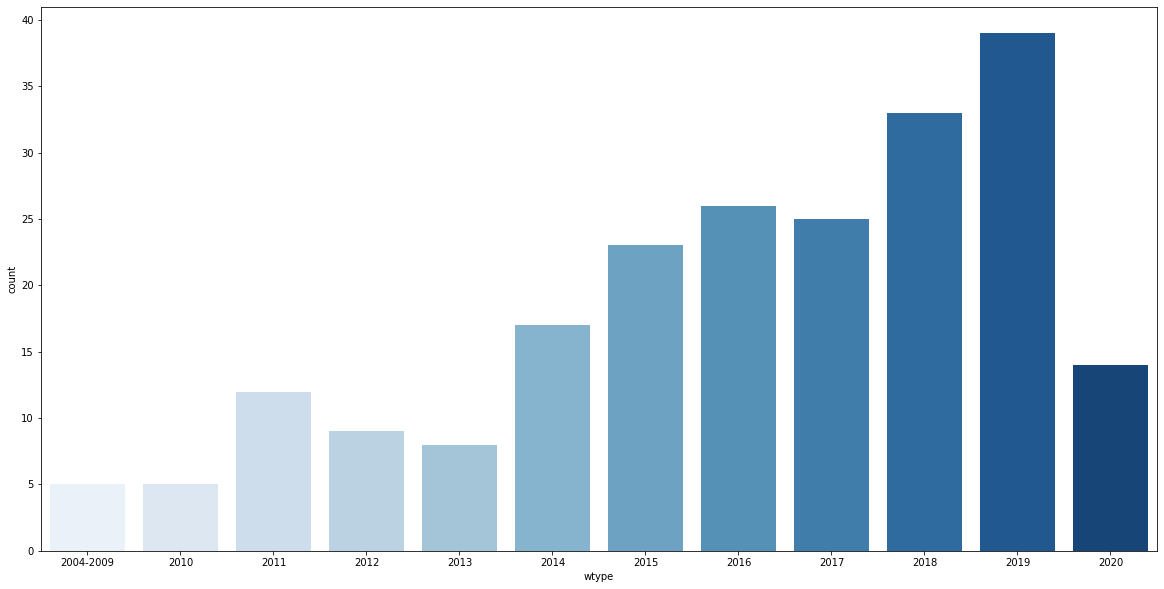

In [94]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="wtype", data=df, order=['2004-2009','2010', '2011', '2012', '2013', '2014', 
                                              '2015', '2016', '2017', '2018', '2019', '2020'], palette='Blues')

# Parse data from crossref using DOI


In [ ]:
cr_df = pd.DataFrame()
for p in range(len(df)): 
    

    if(df.at[p,'DOI'] !='' and df.at[p,'DOI'] !='nan'):
        try:
            jsdata = cr.works(ids=[df.at[p,'DOI']])
        except:
            print(df.at[p,'title'], df.at[p,'DOI'])
            print("Query failed")
            r = dict(df.loc[p])
            cr_df = cr_df.append(r, ignore_index = True)
            continue
        
        if (jsdata['status'] == 'ok'):
            r = dict(df.loc[p])
            r.update(jsdata['message'])
            
            r['citation_count'] =  hb.counts.citation_count(doi =df.at[p,'DOI'])
            cr_df = cr_df.append(r, ignore_index = True)

        
        
    else:
        print(df.loc[p])

In [ ]:
cr_df

In [ ]:
cr_df.drop(['rights','accessDate','archive','archiveLocation','callNumber','charset','content-domain'
            ,'contentType', 'dateAdded','dateModified','edition','funder','language','linkMode',
           'meetingName','note','numberOfVolumes','original-title','presentationType',
           'score','seriesNumber','seriesText','seriesTitle','short-title'], axis=1)

In [ ]:
cr_df.to_csv('CrossRef_DataFrame.csv', index=False)

# Number of citation per publication year

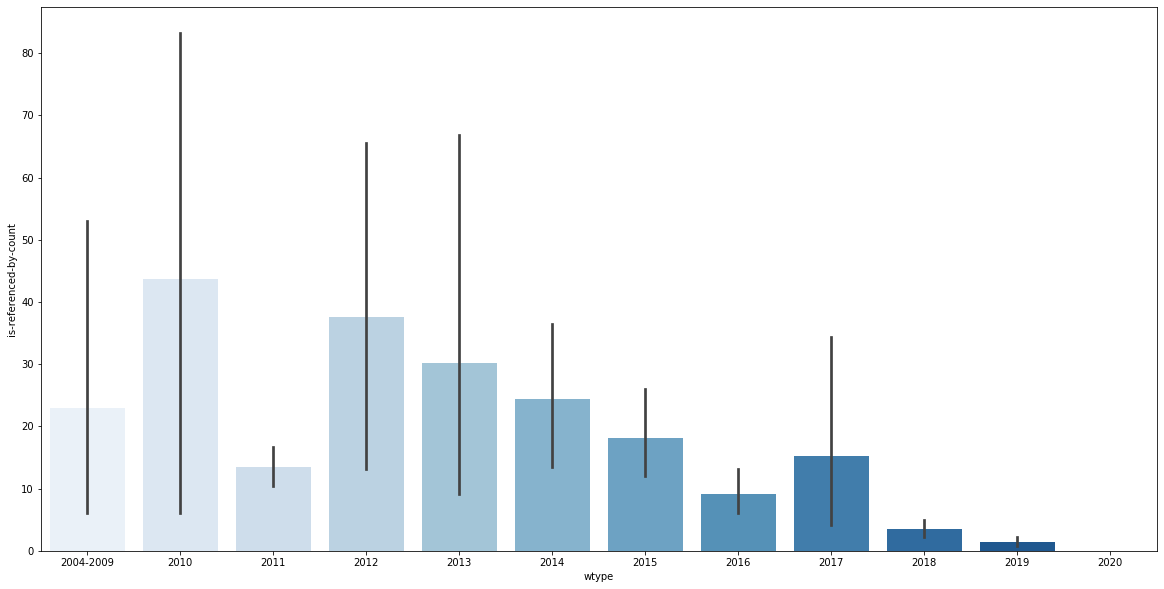

In [63]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x="wtype",y='is-referenced-by-count', data=cr_df, order=['2004-2009','2010', '2011', '2012', '2013', '2014', 
                                              '2015', '2016', '2017', '2018', '2019', '2020'], palette='Blues')

In [18]:
# Publcation venue

In [85]:
cr_df.columns

Index(['DOI', 'ISBN', 'ISSN', 'URL', 'abstractNote', 'accessDate',
       'alternative-id', 'archive', 'archiveLocation', 'author', 'bookTitle',
       'callNumber', 'charset', 'citation_count', 'collections',
       'conferenceName', 'container-title', 'content-domain', 'contentType',
       'created', 'creators', 'date', 'dateAdded', 'dateModified', 'deposited',
       'edition', 'event', 'extra', 'funder', 'indexed',
       'is-referenced-by-count', 'isbn-type', 'issue', 'issued', 'itemType',
       'journalAbbreviation', 'key', 'language', 'libraryCatalog', 'linkMode',
       'meetingName', 'member', 'note', 'numberOfVolumes', 'original-title',
       'pages', 'parentItem', 'place', 'prefix', 'presentationType',
       'proceedingsTitle', 'publicationTitle', 'published-online',
       'published-print', 'publisher', 'publisher-location', 'reference',
       'reference-count', 'references-count', 'relation', 'relations',
       'rights', 'score', 'series', 'seriesNumber', 'seriesTex

In [86]:
cr_df['parentItem'].unique()

array([nan, '3V65JG78', '9HCNUD9A'], dtype=object)

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x="wtype",y='citation_count', data=cr_df, order=['2004-2009','2010', '2011', '2012', '2013', '2014', 
                                              '2015', '2016', '2017', '2018', '2019', '2020'], palette='Blues')